
 **LetsGrowMore TASK #2**


**Data Science Intern May 2022**
# <font color=VIOLET><u>TASK 2: Stock Market Prediction and Forecasting </u></font>

#**Author:** Kadu Aarti Sampatrao



In [50]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# Importing the training set
dataset_train = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [52]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [53]:
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [54]:
dataset_train.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
410,2017-02-02,132.45,138.80,132.40,137.40,137.65,6652685,9084.00
882,2015-03-09,159.05,162.85,157.25,158.80,159.05,2281047,3668.10
1411,2013-01-15,167.00,167.00,157.70,158.60,158.55,2480513,3952.47
1106,2014-04-03,154.00,154.30,149.40,151.50,151.55,2346430,3557.03
411,2017-02-01,129.05,130.65,127.35,129.85,130.10,1221969,1580.78
622,2016-03-28,120.00,121.00,118.50,119.05,119.40,1382616,1653.92
150,2018-02-20,268.70,274.20,261.65,263.00,262.85,5120799,13695.83
1108,2014-04-01,151.45,154.75,148.80,154.70,154.25,4863298,7412.34
1043,2014-07-08,167.65,167.65,157.75,158.05,158.70,3349829,5446.75
424,2017-01-12,128.30,128.40,124.05,124.90,125.15,1403598,1764.05


In [55]:
dataset_train.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [56]:
dataset_train.shape

(2035, 8)

In [57]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [58]:
dataset_train.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [59]:
dataset_train.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [60]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [61]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [62]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [63]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [64]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [65]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [66]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [67]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [33]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 13s 108ms/step - loss: 0.0119
Epoch 2/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0030
Epoch 5/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 7s 108ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 6s 104ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 6s 104ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 7s 107ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0017
Epoch 13/100

In [68]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [69]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

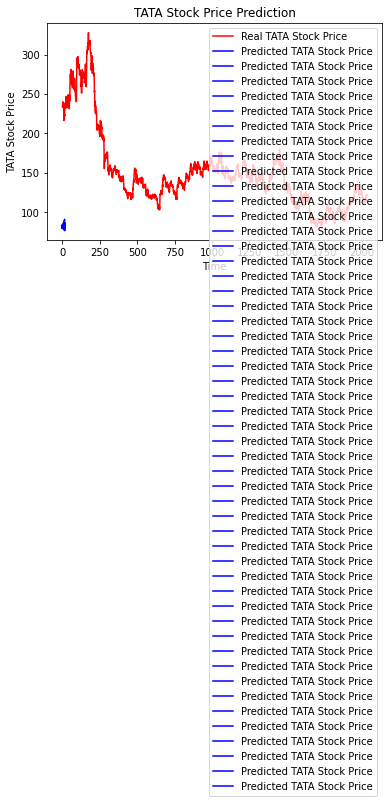

In [70]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

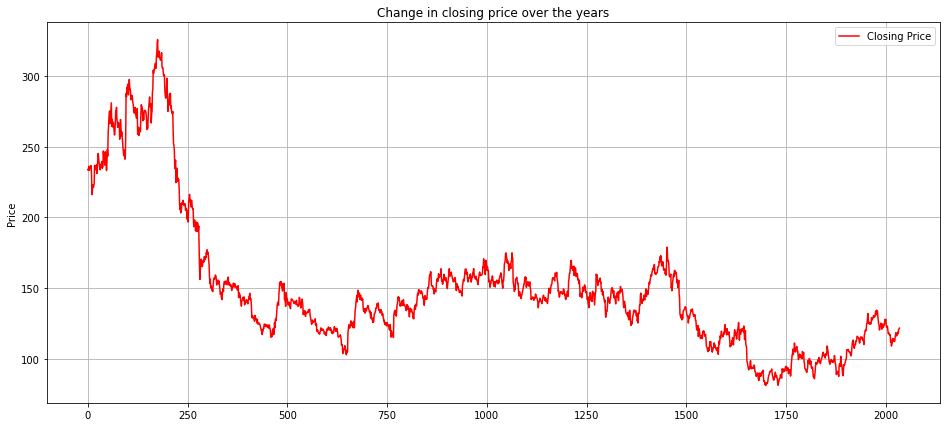

In [37]:
plt.figure(figsize=(10,6))
dataset_train['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

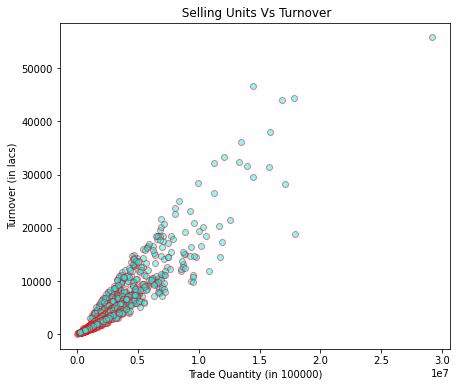

In [38]:
fig=plt.figure(figsize=(7,6))
plt.scatter(dataset_train['Total Trade Quantity'],dataset_train['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='cyan')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()